In [1]:
%autosave 0

Autosave disabled


In [2]:
#Import Packages

import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interp
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from numpy import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [4]:
def printcfm(y_test,y_pred,title='confusion matrix'):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title=title)

In [5]:
def plotRoc(y_real, y_pred_prob):
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_real, y_pred_prob)
    
    # Calculate AUC
    auc = roc_auc_score(y_real, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.text(1, 0.5, "AUC: %3.3f" % (auc), {'color': 'C2', 'fontsize': 18}, va="center", ha="right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

In [6]:
#Setando configurações de visualização
pd.options.display.max_rows=350
pd.options.display.max_columns=60

In [7]:
# df=pd.read_csv('baseProjeto_over.csv', index_col=0)
# df

#df.columns

# X=df[['ATRIB_MAX1',
#        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
#        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

# X.head()

# X.info()

# #cat=['MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',
#        'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',
#        'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]
# #X[cat] = X[cat].astype('category')

# X.info()

# y = df['Perda30']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

#sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#for train_index, test_index in sss.split(X, y):
#    print("TRAIN:", train_index, "TEST:", test_index)
#    X_train, X_test = X[train_index], X[test_index]
#    #y_train, y_test = y[train_index], y[test_index]



In [8]:
# train=pd.read_csv('baseProjetoTrainOver.csv', index_col=0)
# test=pd.read_csv('baseProjetoTest.csv', index_col=0)

In [9]:
# train=pd.read_csv('baseProjetoTrainOverFase1.csv', index_col=0)
# test=pd.read_csv('baseProjetoTestFase1.csv', index_col=0)
dfFase1=pd.read_csv('baseProjeto_entradaModelo_fase1.csv', index_col=0)

# X_train = dfFase1[['ATRIB_MAX1',
#         'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
#         'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

# # X_test = dfFase1[['ATRIB_MAX1',
# #         'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
# #         'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

# y_train = dfFase1['Perda30']

# # y_test = dfFase1['Perda30']

In [10]:
# Using all phases data and sppliting between train and test
# # train=pd.read_csv('baseProjetoTrainOver.csv', index_col=0)
# # test=pd.read_csv('baseProjetoTest.csv', index_col=0)

# Using phase 1 data and sppliting between train and test
train=pd.read_csv('baseProjetoTrainOverFase1.csv', index_col=0)
test=pd.read_csv('baseProjetoTestFase1.csv', index_col=0)

X_train = train[['ATRIB_MAX1',
         'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
         'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

X_test = test[['ATRIB_MAX1',
         'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
         'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

y_test = test['Perda30']

y_train = train['Perda30']

In [11]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

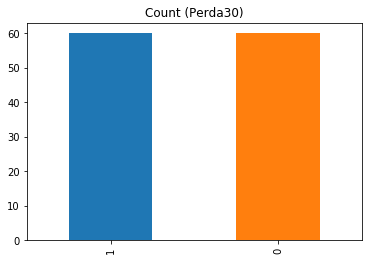

In [12]:
y_train.value_counts().plot(kind='bar', title='Count (Perda30)');

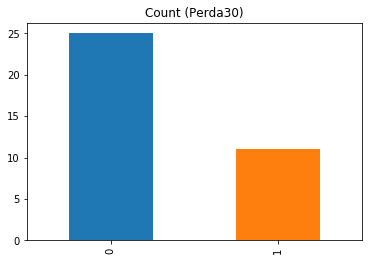

In [13]:
y_test.value_counts().plot(kind='bar', title='Count (Perda30)');

<br>
## Neural Network - Scaled with StandardScaller

In [14]:
steps = [('scaler', StandardScaler()),(('neural', MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 32), random_state=42, max_iter=500, warm_start=True)))]
pipeline = Pipeline(steps)

hidden_layer_sizes=(n1, n2,..., nx) <br>
n1 = number of neurons in hidden layer_1 <br>
nx = number of neurons in hidden layer_x <br>

In [15]:
neural_scaled = pipeline.fit(X_train, y_train)

In [16]:
#for i in range(len(y_pred)):
#    print(y_pred_prob[i],y_pred[i])

In [17]:
# cv_scores = cross_val_score(pipeline, X, y, cv=5)

In [18]:
# print(cv_scores)

# print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


<br>
## Neural Network - Scaled with MinMaxScaller

In [19]:
steps = [('scaler', MinMaxScaler()),(('neural', MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 32), random_state=42, max_iter=1000, warm_start=True)))]
pipeline = Pipeline(steps)

hidden_layer_sizes=(n1, n2,..., nx) <br>
n1 = number of neurons in hidden layer_1 <br>
nx = number of neurons in hidden layer_x <br>

In [20]:
#neural_scaled = pipeline.fit(X_train, y_train)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('neural', MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 32), learning_rate='constant',
       learning_rate_init=...
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=True))])

In [21]:
print(neural_scaled)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('neural', MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 32), learning_rate='constant',
       learning...
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=True))])


In [22]:
y_pred = pipeline.predict(X_train) 

In [23]:
accuracy_score(y_train, y_pred)

0.9916666666666667

In [24]:
y_pred_prob = pipeline.predict_proba(X_train)[:,1]
y_scores = cross_val_predict(pipeline, X_train, y_train, cv=5, method='predict_proba' )
y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=5)
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
# print(y_scores)
# print(np.mean(y_scores))

In [25]:
# for i in range(len(y_pred)):
#     print(y_pred_prob[i],y_pred[i], y_scores[i])

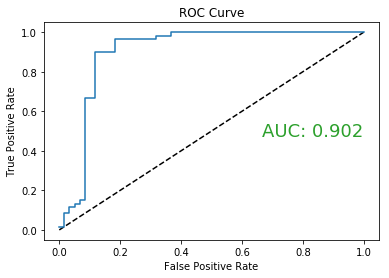

In [26]:
plotRoc(y_train, y_scores)

Confusion matrix, without normalization


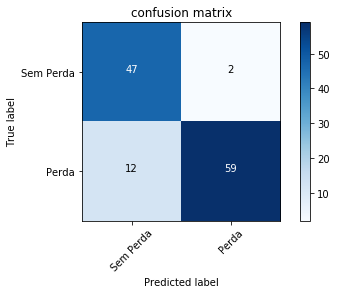

In [27]:
printcfm(y_train_pred, y_pred, title='confusion matrix')

In [28]:
print(classification_report(y_train_pred, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.96      0.87        49
          1       0.97      0.83      0.89        71

avg / total       0.90      0.88      0.88       120



In [29]:
# cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
# print(cv_scores)

## Fine-tunning the model.

To turn on Fine-tunning: <br>
    define ft = 1

In [30]:
ft = 0

### 1 - Grid Search

In [31]:
if ft == 1 :
    rn = MLPClassifier(max_iter=1000, random_state=42)
    parameters = {'solver': ['lbfgs','adam','sgd'], 'alpha': 10.0 ** -np.arange(1, 7),
                 'hidden_layer_sizes': [x for x in itertools.product((5,10,20,30,60,100),repeat=3)]
                 }
    cv = GridSearchCV(rn, param_grid=parameters, verbose=3, n_jobs=-1)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)

    # rf.fit(X_train, y_train);
    cv.fit(X_train_scaled, y_train);

In [32]:
if ft == 1:
    print("Best params: ", cv.best_params_,) 
    print("Best Score: %3.3f" %(cv.best_score_))
    y_pred = cv.predict(X_train_scaled)
    final_model =cv.best_estimator_
    print(final_model)

### Best Model Result (11/2019) - 38 Wells
Using cross validation

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 30, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Best Model Result (11/2018) - 38 Wells

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 10, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Best Model Result (11/2018) - 89 Wells
MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 100, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Best Model Result (09/2018) - 89 Wells
MLPClassifier(activation='relu', alpha=alpha, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 60), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## Regularization of the best model

# <font color = 'red'> Fill alpha value </fontcolor>

In [33]:
alpha=0.1

##### Alpha is a parameter for regularization term, aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.
<br>

In [34]:
steps = [('scaler', StandardScaler()),(('neural', MLPClassifier(activation='relu', alpha=alpha, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 32), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)))]
pipeline = Pipeline(steps)

In [35]:
#neural_scaled = pipeline.fit(X_train, y_train)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('neural', MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 32), learning_rate='constant',
       learning_r...       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False))])

## Predicting the Classes in Trainning Set

In [36]:
y_train_pred = pipeline.predict(X_train) 
y_train_prob = pipeline.predict_proba(X_train)[:,1]

In [37]:
acc_train = accuracy_score(y_train, y_train_pred)
auc_train = roc_auc_score(y_train, y_train_pred)

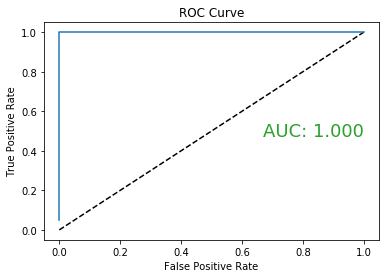

In [38]:
plotRoc(y_train, y_train_prob)

In [39]:
auc_train = roc_auc_score(y_train, y_train_prob)

Confusion matrix, without normalization


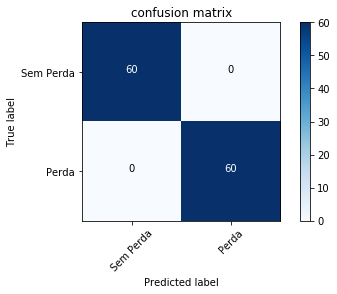

In [40]:
printcfm(y_train, y_train_pred, title='confusion matrix')

In [41]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        60
          1       1.00      1.00      1.00        60

avg / total       1.00      1.00      1.00       120



## Precision/Recall Tradeoff

In [42]:
#y_scores = cross_val_predict(pipeline, X_train, y_train, cv=3, method='predict_proba' )
# print(y_scores)
# print(np.mean(y_scores))

In [43]:
#y_pred_prob

In [44]:
# y_scores.shape

In [45]:
# # hack to work around issue #9589 in Scikit-Learn 0.19.0
# if y_scores.ndim == 2:
#     y_scores = y_scores[:, 1]

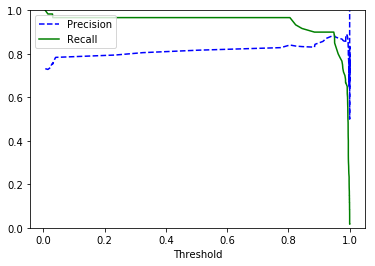

In [46]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [47]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=3)
print(cv_scores)
print(np.mean(cv_scores))

[0.9  0.85 0.95]
0.9


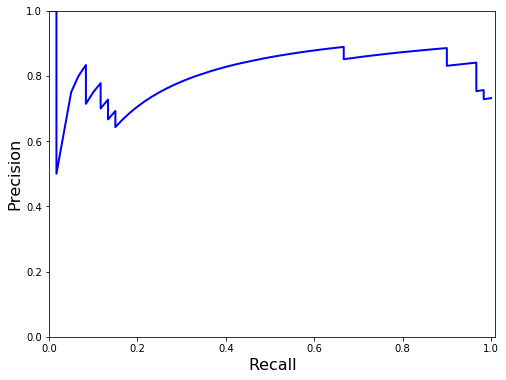

In [48]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1.01, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [49]:
# precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_prob)
# def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
#     plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
#     plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
#     plt.xlabel("Threshold")
#     plt.legend(loc="upper left")
#     plt.ylim([0, 1])
# plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
# plt.show()

## Varying the Threshold for train set

In [50]:
predict_mine = np.where(y_train_prob > 0.5, 1, 0)

In [51]:
y_train_pred_90 = (y_scores > .5)

In [52]:
precision = precision_score(y_train, y_train_pred_90)
recall = recall_score(y_train, y_train_pred_90)
print(precision, recall)

0.8169014084507042 0.9666666666666667


Confusion matrix, without normalization


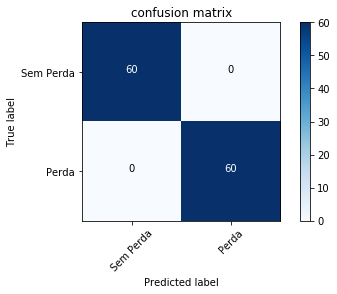

In [53]:
printcfm(y_train, predict_mine, title='confusion matrix')

In [54]:
print(classification_report(y_train, predict_mine))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        60
          1       1.00      1.00      1.00        60

avg / total       1.00      1.00      1.00       120



# Evaluating the model with Cross-Validation

In [55]:
y_pred_prob = pipeline.predict_proba(X_train)[:,1]

In [56]:
y_scores = cross_val_predict(pipeline, X_train, y_train, cv=5, verbose=3, method='predict_proba')

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished


In [57]:
y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=5, verbose=3)
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
# print(y_scores)
# print(np.mean(y_scores))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.7s finished


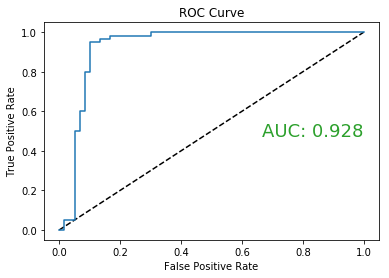

In [58]:
plotRoc(y_train, y_scores)

In [59]:
auc_cv = roc_auc_score(y_train, y_scores)
# auc_train = roc_auc_score(y_train, y_train_pred)
# auc_train

Confusion matrix, without normalization


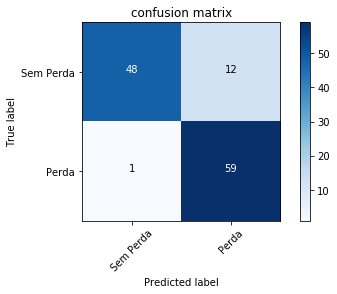

In [60]:
printcfm(y_train, y_train_pred, title='confusion matrix')

In [61]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.98      0.80      0.88        60
          1       0.83      0.98      0.90        60

avg / total       0.91      0.89      0.89       120



# Evaluating the model with LOO

In [62]:
loo = LeaveOneOut()
loo.get_n_splits(dfFase1)

120

In [63]:
for train, test in loo.split(dfFase1):
     print("%s %s" % (train, test))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119] [0]
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119] [1]
[  0   1   3   4   5   6

In [64]:
cv=loo

In [65]:
y_pred_prob = pipeline.predict_proba(X_train)[:,1]

In [66]:
y_scores = cross_val_predict(pipeline, X_train, y_train, cv=cv, verbose=10, method='predict_proba', n_jobs=-1)

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   37.7s finished


In [67]:
y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=cv, verbose=10)
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
# print(y_scores)
# print(np.mean(y_scores))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   58.9s finished


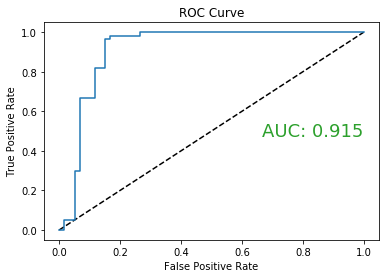

In [68]:
plotRoc(y_train, y_scores)

In [69]:
auc_LoO = roc_auc_score(y_train, y_scores)
auc_LoO

0.915

Confusion matrix, without normalization


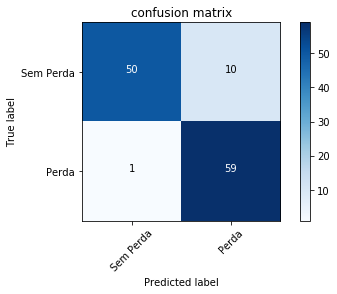

In [70]:
printcfm(y_train, y_train_pred, title='confusion matrix')

In [71]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.98      0.83      0.90        60
          1       0.86      0.98      0.91        60

avg / total       0.92      0.91      0.91       120



# Evaluating the model with Repeated K fold

In [72]:
def perform_repeated_cv(X, y , model):
    #set random seed for repeatability
    random.seed(1)

    #set the number of repetitions
    n_reps = 45

    # perform repeated cross validation
    accuracy_scores = np.zeros(n_reps)
    precision_scores=  np.zeros(n_reps)
    recall_scores =  np.zeros(n_reps)
    auc_scores =  np.zeros(n_reps)
    #result_pred = pd.DataFrame(index=np.arange(30))
    result_pred = y
    
    ##############################
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fig = plt.figure(figsize=(20, 10))
    ###############################

    for u in range(n_reps):

        #randomly shuffle the dataset
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
#         X = X[indices]
#         y = y[indices] #dataset has been randomly shuffled
        X = X.iloc[indices]
        y = y.iloc[indices] #dataset has been randomly shuffled

        #initialize vector to keep predictions from all folds of the cross-validation
        y_predicted = np.zeros(y.shape)
        probas = np.zeros(y.shape)

        #perform 10-fold cross validation
        kf = KFold(n_splits=4 , random_state=142)
        for train, test in kf.split(X):

            #split the dataset into training and testing
#             X_train = X[train]
#             X_test = X[test]
#             y_train = y[train]
#             y_test = y[test]
            X_train = X.iloc[train]
            X_test = X.iloc[test]
            y_train = y.iloc[train]
            y_test = y.iloc[test]

#             #standardization
#             scaler = preprocessing.StandardScaler().fit(X_train)
#             X_train = scaler.transform(X_train)
#             X_test = scaler.transform(X_test)

            #train model
            clf = model
            clf.fit(X_train, y_train)

            #make predictions on the testing set
            y_predicted[test] = clf.predict(X_test)
#            print(y_predicted[test],y_test,type(y_predicted))
            #y_train_pred_array = np.append(y_train_pred_array,y_train_pred)
#            print(result_pred)



            
            ###############################plot
#             probas_ = clf.predict_proba(X_test)
            probas[test] = clf.predict_proba(X_test)[:, 1]
#             print(probas[test], type(probas), probas.size)
         
#        print(y,y_predicted)
        #result_pred = y
        df_pred = pd.DataFrame(y_predicted, index=y.index,columns=[u])
        result_pred = pd.concat([result_pred, df_pred], axis=1) 
        

                
    
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y, probas)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        #roc_auc = auc(fpr, tpr) - Change to obtain AUC by predict proba
#06/11 - 23:26                roc_auc = roc_auc_score(y, y_predicted)
        roc_auc = roc_auc_score(y, probas)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
        label='ROC fold %d (AUC = %0.2f)' % (u, roc_auc))

            
            ################################

        #record scores
        accuracy_scores[u] = accuracy_score(y, y_predicted)
        precision_scores[u] = precision_score(y, y_predicted)
        recall_scores[u]  = recall_score(y, y_predicted)
#06/11 - 18:39                auc_scores[u] = roc_auc_score(y, y_predicted)
        auc_scores[u] = roc_auc_score(y, probas)
    ###############################plot
#    print(result_pred)
    
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
    label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
#     mean_auc = auc(mean_fpr, mean_tpr)
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)


    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    #plt.legend(loc="lower right")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
               fancybox=True, shadow=True, ncol=5)
    plt.show()
    ################################
    
    #return all scores
    return accuracy_scores, precision_scores, recall_scores, auc_scores, result_pred

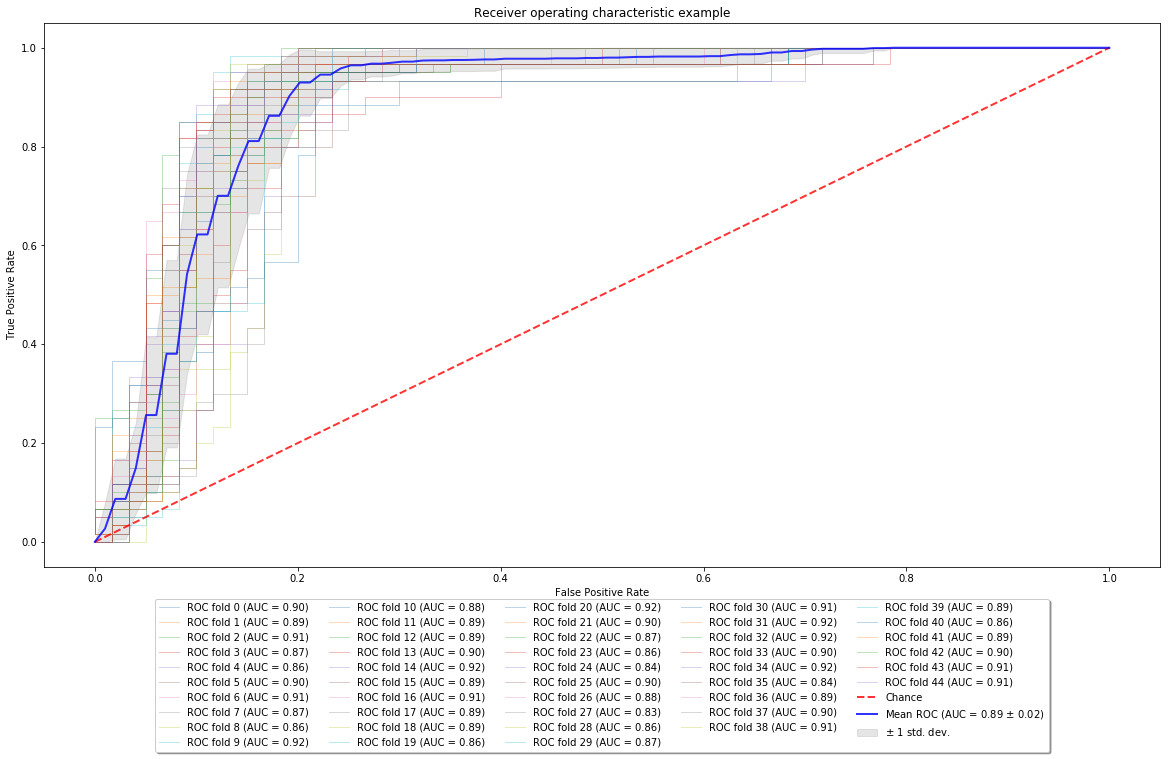

In [73]:
accuracy_scores, precision_scores, recall_scores, auc_scores, result_pred = perform_repeated_cv(X_train, y_train, pipeline)

In [74]:
print(accuracy_scores, accuracy_scores.size)

[0.88 0.88 0.88 0.87 0.88 0.88 0.89 0.9  0.88 0.88 0.82 0.86 0.87 0.86
 0.89 0.86 0.89 0.82 0.9  0.83 0.88 0.88 0.86 0.82 0.83 0.9  0.88 0.81
 0.88 0.88 0.89 0.88 0.87 0.83 0.88 0.86 0.88 0.85 0.92 0.87 0.86 0.89
 0.89 0.85 0.89] 45


In [75]:
print(precision_scores, recall_scores)

[0.84 0.82 0.85 0.8  0.81 0.84 0.85 0.86 0.82 0.82 0.83 0.8  0.81 0.83
 0.82 0.82 0.85 0.76 0.83 0.79 0.84 0.85 0.81 0.79 0.81 0.85 0.82 0.79
 0.83 0.83 0.85 0.84 0.83 0.79 0.83 0.8  0.82 0.8  0.88 0.82 0.8  0.85
 0.84 0.81 0.83] [0.95 0.97 0.93 0.98 0.98 0.93 0.95 0.95 0.98 0.98 0.82 0.95 0.95 0.9
 1.   0.92 0.95 0.95 1.   0.9  0.95 0.92 0.93 0.87 0.87 0.97 0.98 0.83
 0.95 0.97 0.95 0.95 0.92 0.9  0.95 0.95 0.97 0.93 0.97 0.93 0.95 0.95
 0.97 0.92 0.98]


In [76]:
print(auc_scores, auc_scores.size)

[0.9  0.89 0.91 0.87 0.86 0.9  0.91 0.87 0.86 0.92 0.88 0.89 0.89 0.9
 0.92 0.89 0.91 0.89 0.89 0.86 0.92 0.9  0.87 0.86 0.84 0.9  0.88 0.83
 0.86 0.87 0.91 0.92 0.92 0.9  0.92 0.84 0.89 0.9  0.91 0.89 0.86 0.89
 0.9  0.91 0.91] 45


No handles with labels found to put in legend.


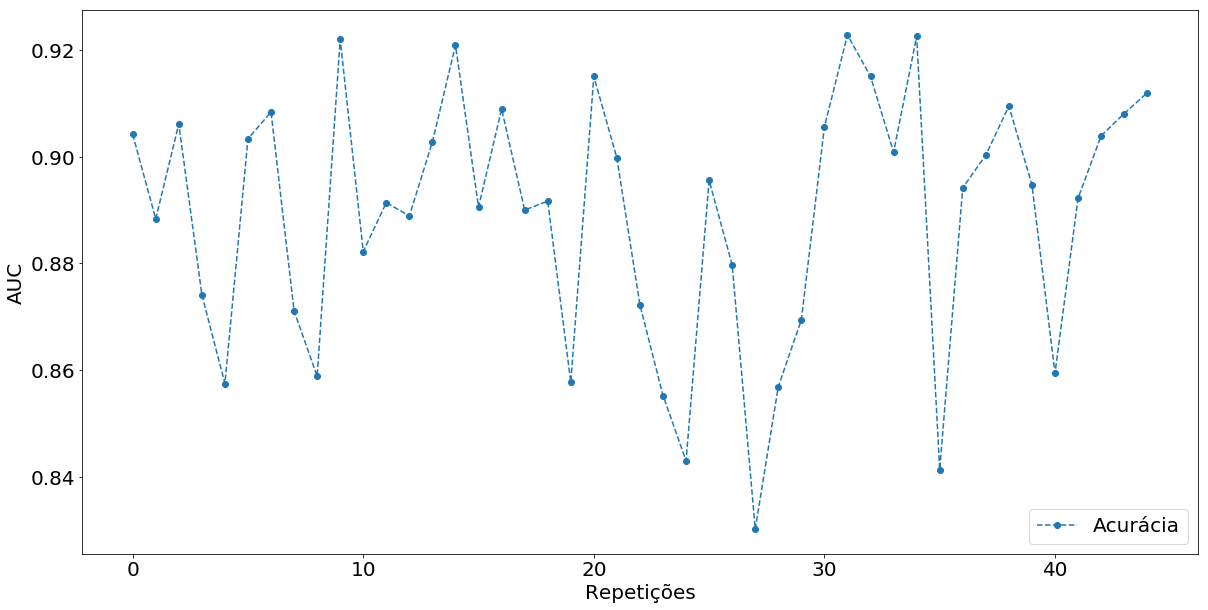

In [77]:
fig = plt.figure(figsize=(20, 10))
plt.plot(auc_scores, '--o')
plt.legend(loc='lower right')
plt.ylabel('AUC', fontsize=20);
plt.xlabel('Repetições', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=20);
plt.tick_params(axis='both', which='minor', labelsize=18);
#plt.xlim([0, 18])
#plt.ylim([0.5, 1])
plt.legend(('Acurácia', 'AUC'), loc='lower right', prop={'size': 20})
plt.show()

In [78]:
auc_scores.mean()

0.889296296296296

In [79]:
auc_scores.std()

0.023469298159601047

In [80]:
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(auc_scores), np.std(auc_scores)))

Accuracy: 0.89 (+/- 0.02)


In [81]:
#result_pred.to_csv('result_kfold_MLP.csv', encoding='utf-8')

# Predicting the Classes in Test Set

In [82]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:,1]

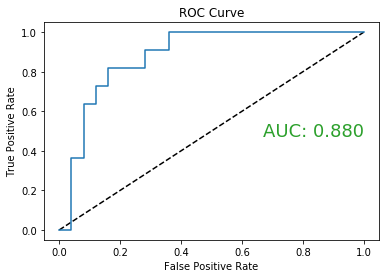

In [83]:
plotRoc(y_test, y_pred_prob)

In [84]:
auc_test = roc_auc_score(y_test, y_pred_prob)

Confusion matrix, without normalization


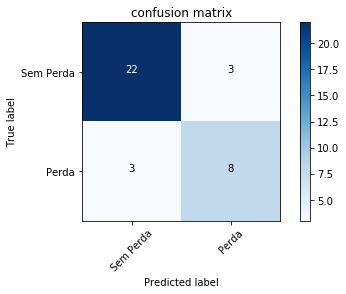

In [85]:
printcfm(y_test, y_pred, title='confusion matrix')

In [86]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.88      0.88        25
          1       0.73      0.73      0.73        11

avg / total       0.83      0.83      0.83        36



## Varying the Threshold for test set

In [87]:
predict_mine = np.where(y_pred_prob > .0, 1, 0)

Confusion matrix, without normalization


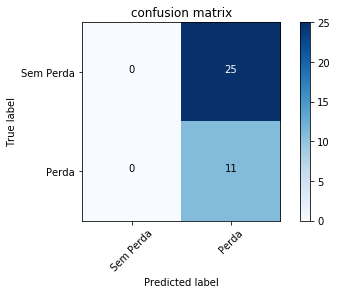

In [88]:
printcfm(y_test, predict_mine, title='confusion matrix')

In [89]:
print(classification_report(y_test, predict_mine))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        25
          1       0.31      1.00      0.47        11

avg / total       0.09      0.31      0.14        36



C:\Users\giova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Results

In [90]:
print("alpha: ", alpha)
print("AUC Train: %3.3f" % (auc_train))
print("AUC Repeated k-fold: %0.2f (+/- %0.2f)" % (np.mean(auc_scores), np.std(auc_scores)))
print("AUC LoO: %3.3f" % (auc_LoO))
print("AUC test: %3.3f" % (auc_test))
print("AUC cv: %3.3f" % (auc_cv))
#print("Accuracy Train: %3.2f%%" % (acc_train*100))
#print("Accuracy Test %3.2f%%" % (acc_test*100))

alpha:  0.1
AUC Train: 1.000
AUC Repeated k-fold: 0.89 (+/- 0.02)
AUC LoO: 0.915
AUC test: 0.880
AUC cv: 0.928


# Draft

In [91]:
#  validation curve off
vc = 0

In [92]:
if vc == 1:
    #X=np.concatenate((X_train_scaled,X_test_scaled),axis=0)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X=X_train_scaled
    # print(X)
    #y=np.append(y_train,y_test)
    y=y_train
    # print(y)
    param_range =  10.0 ** np.arange(-10, 10)
    final_model = MLPClassifier(activation='relu', alpha=alpha, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 32), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [93]:
if vc == 1:

    print(__doc__)

    plt.rcParams["figure.figsize"] = (20,10)
    plt.rcParams.update({'font.size': 20})
    plt.grid(True,which="both", linestyle='--')
    
    train_scores, test_scores = validation_curve(
        final_model, X, y, param_name="alpha", param_range=param_range,
        cv=10, scoring="roc_auc", n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with RF")
    plt.xlabel("alpha")
    plt.ylabel("AUC")
    #plt.ylim(0.0, 1.1)
    #plt.xlim(-1, 22)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

In [94]:
if vc == 1:
    print(__doc__)

    plt.rcParams["figure.figsize"] = (20,10)
    plt.rcParams.update({'font.size': 20})
    plt.grid(True,which="both", linestyle='--')
    
    train_scores, test_scores = validation_curve(
        final_model, X, y, param_name="alpha", param_range=param_range,
        cv=10, scoring="accuracy", n_jobs=-1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with SVC")
    plt.xlabel("$\gamma$")
    plt.ylabel("Accuracy")
    #plt.ylim(0.0, 1.1)
    #plt.xlim(-1, 22)
    lw = 2
    
    plt.semilogx(param_range, train_scores_mean, label="Treino",
                 color="darkorange", lw=lw)
 
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Validação cruzada",
                 color="navy", lw=lw)

    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

In [95]:
np.arange(-1, 10)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

## Export results

In [99]:
export = 1

In [97]:
MLP_df = pd.concat([X_test, y_test], axis=1)  # features and actual
MLP_df['Predicted'] = y_pred  # creates a predicted column to the complete_df, now you'll have features, actual, and predicted
MLP_df

,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,Perda30,Predicted
65,0.95,0.00,0.5500,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
97,0.27,262.80,1.0000,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1
47,0.95,350.00,1.7700,1,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0
55,0.95,145.00,1.2900,0,1,0,1,0,1,1,0,1,1,1,1,0,1,0,1
19,0.95,0.00,1.2774,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0
92,0.81,25.00,0.5200,0,1,0,1,1,1,0,0,1,1,1,1,1,1,0,0
54,0.07,1000.00,1.0100,0,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0
64,0.94,201.00,0.3900,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0
111,0.05,1000.00,0.4400,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0
20,0.95,40.00,1.1000,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0


In [100]:
if export == 1:
    MLP_df.to_csv('MLP_results.csv', encoding='utf-8')